# Basic classification: Classify images of clothing
- Learn how to train a neural network model to classify images of cloting.
- Full tutorial reference: https://www.tensorflow.org/tutorials/keras/classification

### Import TensorFlow and necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.9.1


### Download the Fashion MNIST dataset
- Fashion MNIST contains 70,000 grayscale images in 10 categories.

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess the data
- Preprocessing is an important step before training the neural network.
- Note that the pixel values fall in the range of 0 to 255, so it needs to be scaled down to a range between 0 and 1.

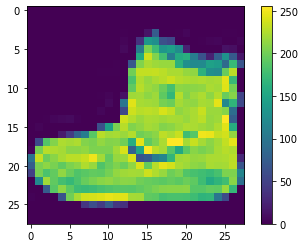

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

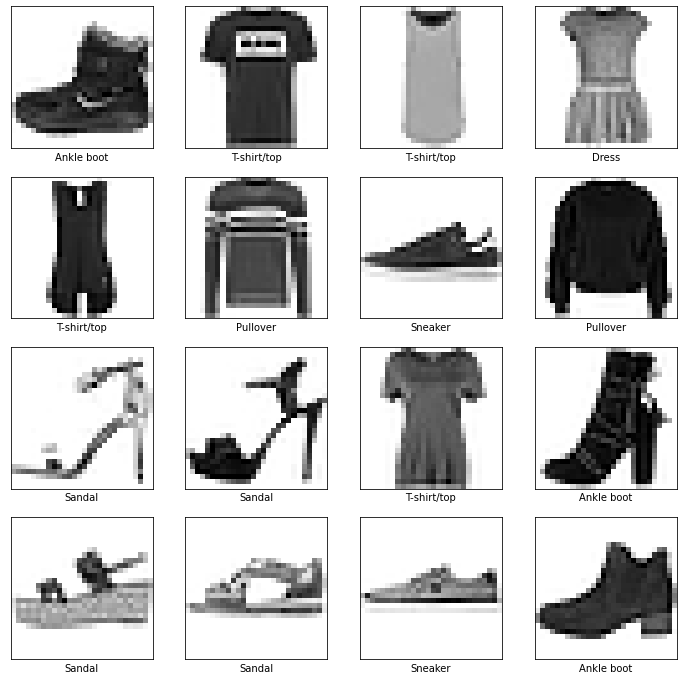

In [5]:
# Scale down values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# display the first 16 images from the training set to check that the data is in the correct format
plt.figure(figsize=(12, 12))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.xticks([]) # remove xticks
    plt.yticks([]) # remove yticks
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.grid(False)
plt.show()

### Build the model
- Set up the layers
- Compiling the model

In [6]:
model = tf.keras.Sequential([
    # this layer transforms the format of the images from a 2-D array to a 1-D array
    tf.keras.layers.Flatten(input_shape=(28, 28)),  
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)
])

In [7]:
model.compile(
    optimizer='adam', # This is how the model is updated based on the data it sees and its loss function
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # This measures how accurate the model is
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()] # This monitors the training and testing steps
)

### Train the model
- Training the model requires the following steps:
    1. Feed the training data to the model.
    2. Model learns to associate train images and labels.
    3. Use the model to make predictions about a test set.
    4. Verify the predictions by matching the labels from the *test_labels* array.

In [8]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    verbose=1,
    validation_split=0.2
)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8050 - sparse_categorical_accuracy: 0.7653 - val_loss: 0.5827 - val_sparse_categorical_accuracy: 0.8321
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6312 - sparse_categorical_accuracy: 0.8114 - val_loss: 0.5463 - val_sparse_categorical_accuracy: 0.8416
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6008 - sparse_categorical_accuracy: 0.8175 - val_loss: 0.5141 - val_sparse_categorical_accuracy: 0.8498
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5884 - sparse_categorical_accuracy: 0.8226 - val_loss: 0.5333 - val_sparse_categorical_accuracy: 0.8366
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5806 - sparse_categorical_accuracy: 0.8241 - val_loss: 0.5243 - val_sparse_categorical_accuracy: 0.8414
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5808 - spars

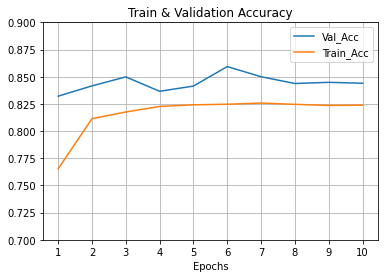

In [10]:
epochs = list(range(1, 11))
plt.figure()
plt.title('Train & Validation Accuracy')
plt.plot(epochs, history.history['val_sparse_categorical_accuracy'], label='Val_Acc')
plt.plot(epochs, history.history['sparse_categorical_accuracy'], label='Train_Acc')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylim([0.7, 0.9])
plt.grid(True)
plt.legend()
plt.show()

### Evaluate accuracy

In [11]:
eval_test = model.evaluate(test_images, test_labels, verbose=2)
print('\nSparse Categorical Accuracy:', eval_test[1])

313/313 - 1s - loss: 0.5345 - sparse_categorical_accuracy: 0.8361 - 860ms/epoch - 3ms/step

Sparse Categorical Accuracy: 0.8360999822616577


### Verify predictions

In [12]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [13]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [14]:
def plot_image(i, predictions_array, true_label, true_img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(true_img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                 100*np.max(predictions_array),
                                 class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

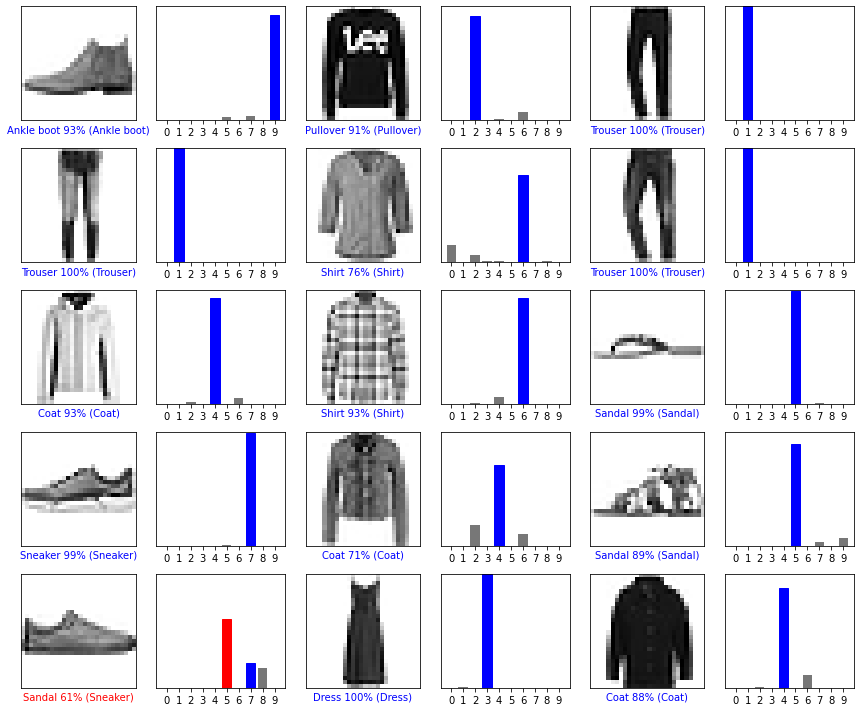

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels[i])
plt.tight_layout()
plt.show()

In [16]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.